/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_7063/793119712.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_7063/793119712.py:44: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_7063/793119712.py:55: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


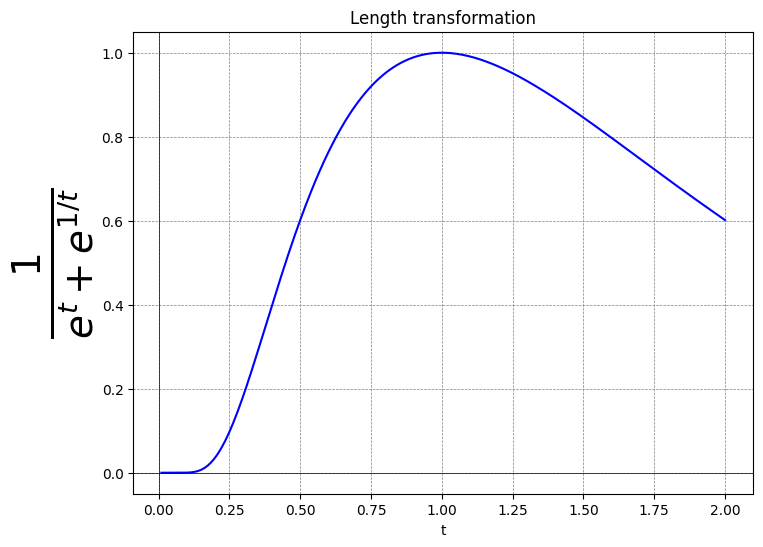

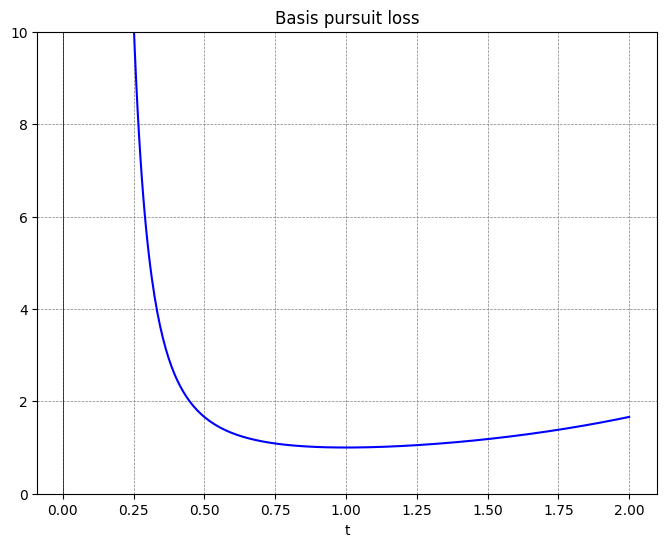

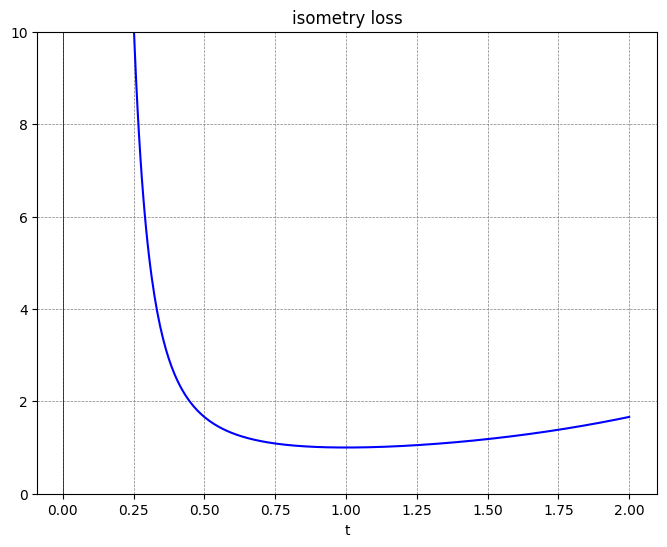

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import math
import matplotlib.pyplot as plt

# at least, we want the isometry loss in 1 dimension to be equal to the rescaled basis pursuit loss

# This is the rescaled length... which is the inverse of the basis pursuit loss
def g(t):
    return (np.exp(t) + np.exp(t**(-1)))**(-1) * (2*math.e)

def isometry_loss(t):
    return (np.exp(t) + np.exp(1/t) )/ (2 * math.e)


matrix_values = np.linspace(0.01, 2, 400)

length_values = g(matrix_values)

basis_pursuit_losses = np.asarray(length_values)**(-1)
loss_values_isometry = [isometry_loss(t) for t in matrix_values]

# Plot the function
fig, ax = plt.subplots(1,1,figsize=(8, 6))
ax.plot(matrix_values, length_values, color='blue')
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.set_title('Length transformation')
ax.set_ylabel(r'$\frac{1}{e^t + e^{1/t}}$', fontsize = 40) # log concave
ax.set_xlabel('t')
fig.show()

fig, ax = plt.subplots(1,1,figsize=(8, 6))
ax.plot(matrix_values, basis_pursuit_losses, color = 'blue')
# ax.plot(t_values, loss_values_isometry, color='blue')
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.set_title('Basis pursuit loss')
ax.set_ylim(0,10)
ax.set_xlabel('t')
fig.show()

fig, ax = plt.subplots(1,1,figsize=(8, 6))
ax.plot(matrix_values, loss_values_isometry, color = 'blue')
# ax.plot(t_values, loss_values_isometry, color='blue')
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.set_title('isometry loss')
ax.set_ylim(0,10)
ax.set_xlabel('t')
fig.show()

[0.1]
[0.12242332]
[0.14133272]
[0.15799496]
[0.17306032]
[0.18691534]
[0.19981194]
[0.21192518]
[0.22338252]
[0.23428021]
[0.24469305]
[0.2546805]
[0.26429079]
[0.27356369]
[0.28253241]
[0.29122505]
[0.29966564]
[0.30787492]
[0.31587092]
[0.32366944]
[0.33128443]
[0.33872827]
[0.34601201]
[0.35314555]
[0.36013782]
[0.36699689]
[0.3737301]
[0.38034413]
[0.38684509]
[0.39323859]
[0.3995298]
[0.40572346]
[0.41182399]
[0.41783545]
[0.42376165]
[0.4296061]
[0.43537211]
[0.44106274]
[0.44668088]
[0.45222923]
[0.45771033]
[0.46312657]
[0.46848019]
[0.47377331]
[0.47900796]
[0.48418601]
[0.48930927]
[0.49437944]
[0.49939813]
[0.5043669]
[0.50928718]
[0.51416039]
[0.51898783]
[0.52377079]
[0.52851046]
[0.53320801]
[0.53786452]
[0.54248107]
[0.54705867]
[0.55159827]
[0.55610082]
[0.5605672]
[0.56499828]
[0.56939488]
[0.57375778]
[0.57808776]
[0.58238555]
[0.58665186]
[0.59088736]
[0.59509271]
[0.59926856]
[0.60341551]
[0.60753415]
[0.61162506]
[0.61568879]
[0.61972587]
[0.62373682]
[0.62772214]

/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_7063/3229473873.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_7063/3229473873.py:31: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_7063/3229473873.py:42: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


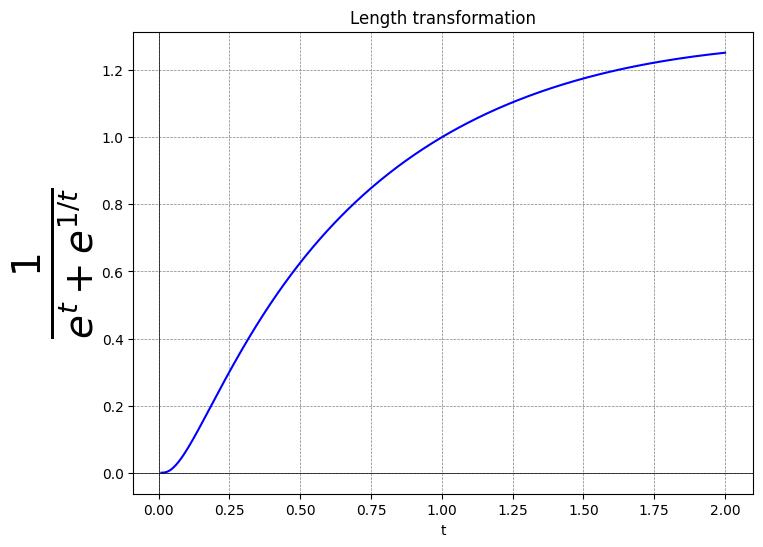

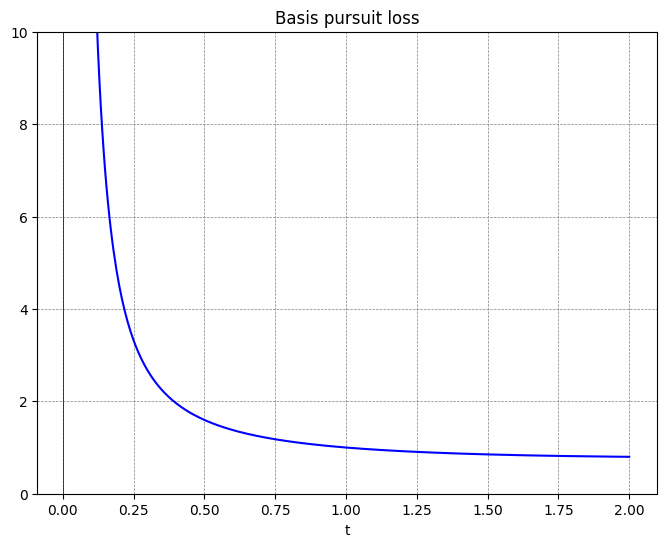

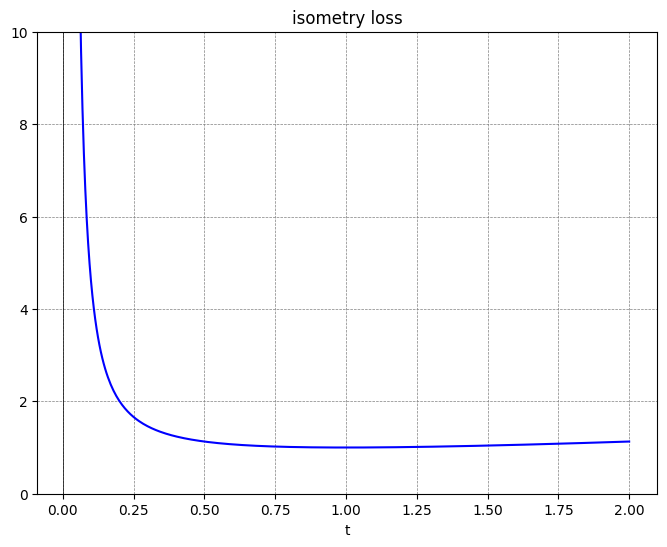

In [6]:
# now i want to check (high dimensional) versions of g() and isometry_loss from the package
from convexlocalisometry.transformation import exponential_transformation
from convexlocalisometry.loss import isometry_loss
from einops import rearrange

power = .5
rearranged_matrix_values = rearrange(matrix_values, 'n -> n 1 1')
length_values = [exponential_transformation(rmv, power)[0][0] for rmv in rearranged_matrix_values]
loss_values_isometry = [isometry_loss(rmv, power) for rmv in rearranged_matrix_values]
basis_pursuit_losses = np.asarray(length_values)**(-1)
# Plot the function
fig, ax = plt.subplots(1,1,figsize=(8, 6))
ax.plot(matrix_values, length_values, color='blue')
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.set_title('Length transformation')
ax.set_ylabel(r'$\frac{1}{e^t + e^{1/t}}$', fontsize = 40) # log concave
ax.set_xlabel('t')
fig.show()

fig, ax = plt.subplots(1,1,figsize=(8, 6))
ax.plot(matrix_values, basis_pursuit_losses, color = 'blue')
# ax.plot(t_values, loss_values_isometry, color='blue')
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.set_title('Basis pursuit loss')
ax.set_ylim(0,10)
ax.set_xlabel('t')
fig.show()

fig, ax = plt.subplots(1,1,figsize=(8, 6))
ax.plot(matrix_values, loss_values_isometry, color = 'blue')
# ax.plot(t_values, loss_values_isometry, color='blue')
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.set_title('isometry loss')
ax.set_ylim(0,10)
ax.set_xlabel('t')
fig.show()


In [9]:
exponential_transformation(rearranged_matrix_values[-1], power)[0][0]

[1.41421356]


np.float64(1.251914127411467)

In [5]:
g(2)

np.float64(0.6015376828363046)

/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_5375/794418871.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_5375/794418871.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_5375/794418871.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


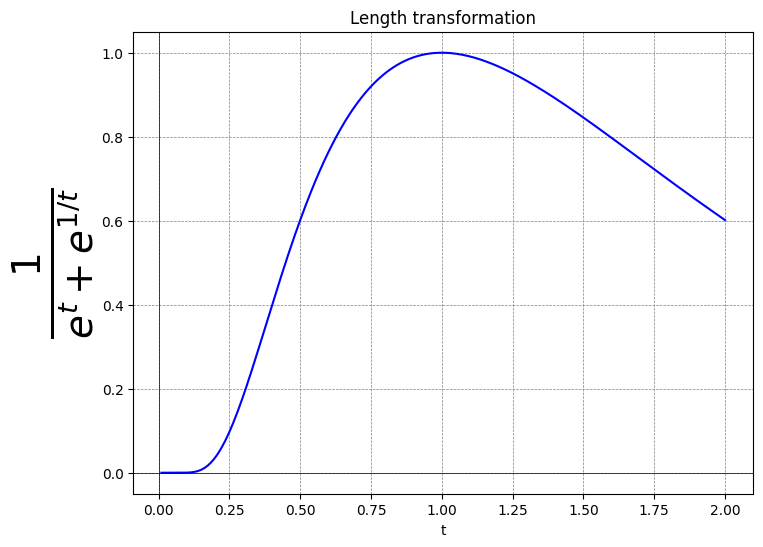

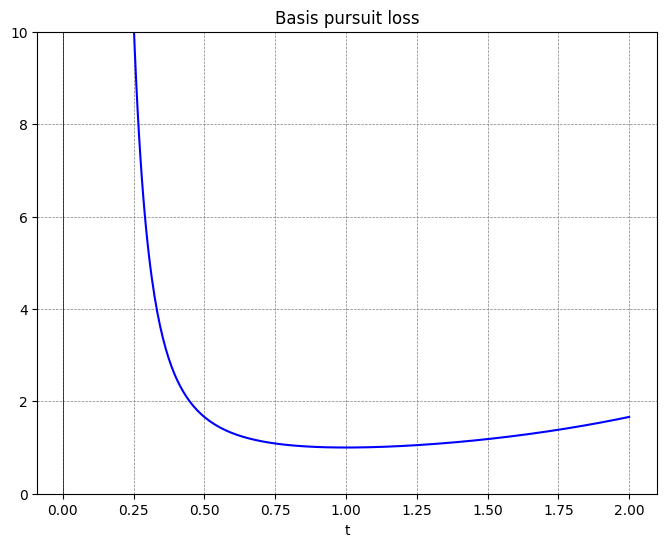

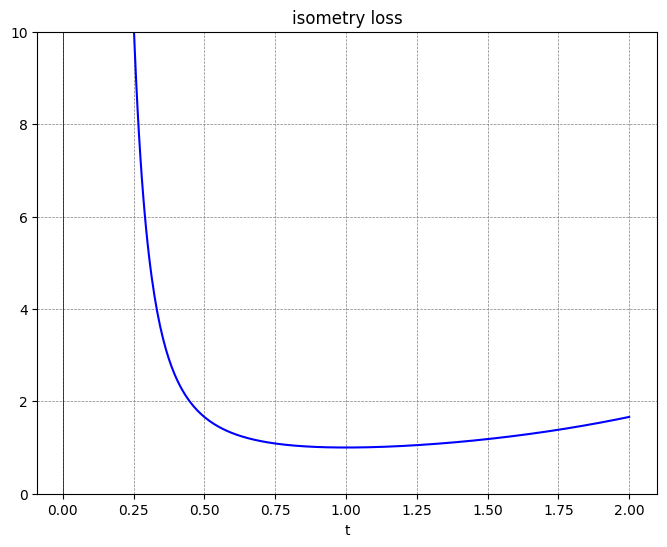

In [43]:
# We need to add a check of the regression solver in 1D next
# Actually, first lets check group lasso norm using the analytical inverse
from convexlocalisometry.loss import group_lasso_norm

rearranged_matrix_values = np.asarray(rearrange(matrix_values, 'n -> n 1 1'))
transformed_values = np.asarray([exponential_transformation(rmv) for rmv in rearranged_matrix_values])
betas = transformed_values**(-1)
basis_pursuit_losses = [group_lasso_norm(beta) for beta in betas] # group lasso norm probably available in a package
loss_values_isometry = [isometry_loss(rmv) for rmv in rearranged_matrix_values]

# Plot the function
fig, ax = plt.subplots(1,1,figsize=(8, 6))
ax.plot(matrix_values, transformed_values[:,0,0], color='blue')
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.set_title('Length transformation')
ax.set_ylabel(r'$\frac{1}{e^t + e^{1/t}}$', fontsize = 40) # log concave
ax.set_xlabel('t')
fig.show()

fig, ax = plt.subplots(1,1,figsize=(8, 6))
ax.plot(matrix_values, basis_pursuit_losses, color = 'blue')
# ax.plot(t_values, loss_values_isometry, color='blue')
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.set_title('Basis pursuit loss')
ax.set_ylim(0,10)
ax.set_xlabel('t')
fig.show()

fig, ax = plt.subplots(1,1,figsize=(8, 6))
ax.plot(matrix_values, loss_values_isometry, color = 'blue')
# ax.plot(t_values, loss_values_isometry, color='blue')
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.set_title('isometry loss')
ax.set_ylim(0,10)
ax.set_xlabel('t')
fig.show()


# We can then add a check of the solver in multiD (closed form available for diagonal but thats extra work)

/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_5375/1643980209.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_5375/1643980209.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_5375/1643980209.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


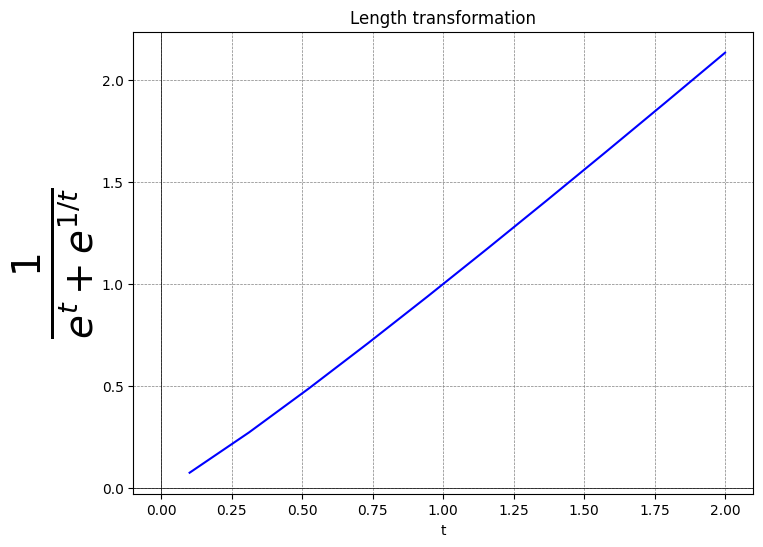

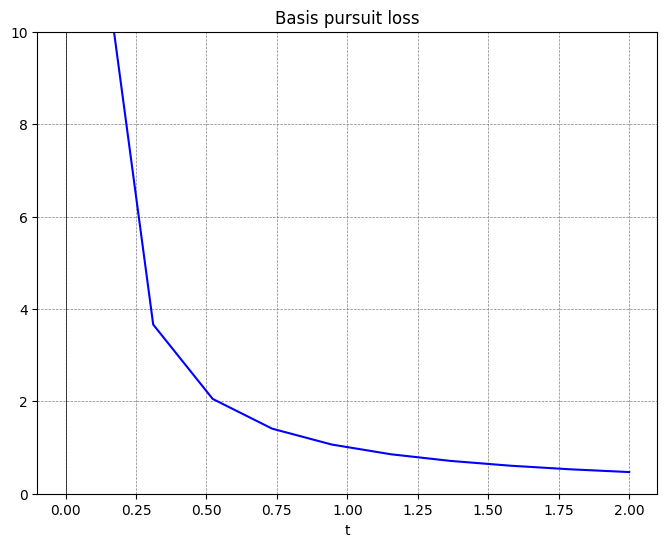

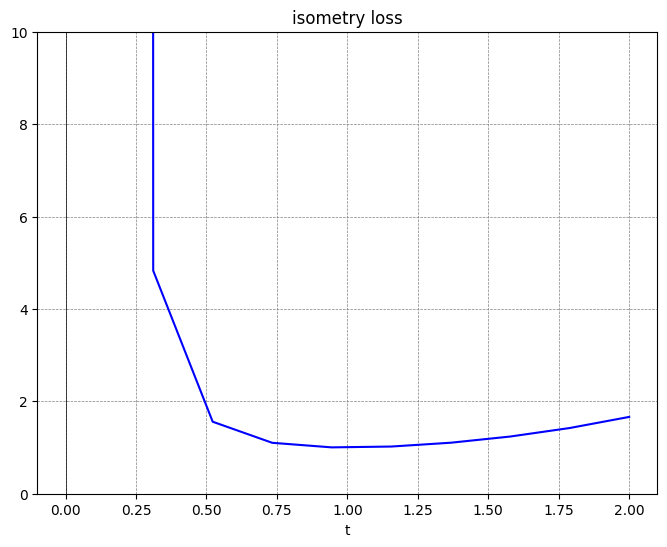

In [57]:
# Now lets check of the regression solver in 1D
# it works but not well at low values wow.  needs a less convex function at low values
from convexlocalisometry.algorithm import group_basis_pursuit
from convexlocalisometry.loss import group_lasso_norm
matrix_values = np.linspace(0.1, 2, 10)
rearranged_matrix_values = np.asarray(rearrange(matrix_values, 'n -> n 1 1'))
transformed_values = np.asarray([exponential_transformation(rmv, .1) for rmv in rearranged_matrix_values])
betas = np.asarray([group_basis_pursuit(tv) for tv in transformed_values])
basis_pursuit_losses = [group_lasso_norm(beta) for beta in betas] # group lasso norm probably available in a package
loss_values_isometry = [isometry_loss(rmv) for rmv in rearranged_matrix_values]

# Plot the function
fig, ax = plt.subplots(1,1,figsize=(8, 6))
ax.plot(matrix_values, transformed_values[:,0,0], color='blue')
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.set_title('Length transformation')
ax.set_ylabel(r'$\frac{1}{e^t + e^{1/t}}$', fontsize = 40) # log concave
ax.set_xlabel('t')
fig.show()

fig, ax = plt.subplots(1,1,figsize=(8, 6))
ax.plot(matrix_values, basis_pursuit_losses, color = 'blue')
# ax.plot(t_values, loss_values_isometry, color='blue')
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.set_title('Basis pursuit loss')
ax.set_ylim(0,10)
ax.set_xlabel('t')
fig.show()

fig, ax = plt.subplots(1,1,figsize=(8, 6))
ax.plot(matrix_values, loss_values_isometry, color = 'blue')
# ax.plot(t_values, loss_values_isometry, color='blue')
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.set_title('isometry loss')
ax.set_ylim(0,10)
ax.set_xlabel('t')
fig.show()

# We can then add a check of the solver in multiD (closed form available for diagonal but thats extra work)

In [ ]:
betas = np.asarray([group_basis_pursuit(tv) for tv in transformed_values])


In [13]:
import cvxpy as cp
eps = 1e-12
matrix = transformed_values[100]
p, d = matrix.shape
beta = cp.Variable((p, d))  # could initialize with lasso?
objective = cp.Minimize(cp.sum(cp.norm(beta, axis=1)))
constraints = [matrix @ beta == np.identity(d)]
problem = cp.Problem(objective, constraints)
scs_opts = {"eps": eps}
asdf = problem.solve(solver=cp.SCS, **scs_opts)
print(asdf)

1.619129563333574


In [39]:
import cvxpy as cp
eps = 1e-12
matrix = np.identity(2)
matrix[0,0] = -.0000001 
p, d = matrix.shape
beta = cp.Variable((p, d))  # could initialize with lasso?
objective = cp.Minimize(cp.sum(cp.norm(beta, axis=1)))
constraints = [matrix @ beta == np.identity(d)]
problem = cp.Problem(objective, constraints)
scs_opts = {"eps": eps}
asdf = problem.solve(solver=cp.SCS, **scs_opts)
print(asdf)

inf


In [38]:
beta.value

In [41]:
asdf is np.inf

True

In [14]:
beta.value

array([[1.61912956]])

In [2]:
import cvxpy

In [13]:
length_values

array([[[           nan]],

       [[8.06166342e+85]],

       [[3.85079228e+42]],

       [[1.39719997e+28]],

       [[8.41613721e+20]],

       [[3.91764744e+16]],

       [[5.06952239e+13]],

       [[4.38599626e+11]],

       [[1.24421137e+10]],

       [[7.78998350e+08]],

       [[8.48888084e+07]],

       [[1.38419787e+07]],

       [[3.05366444e+06]],

       [[8.50012978e+05]],

       [[2.84035217e+05]],

       [[1.09848193e+05]],

       [[4.78395023e+04]],

       [[2.29748554e+04]],

       [[1.19705287e+04]],

       [[6.68006573e+03]],

       [[3.95171237e+03]],

       [[2.45758878e+03]],

       [[1.59585248e+03]],

       [[1.07594834e+03]],

       [[7.49667358e+02]],

       [[5.37667680e+02]],

       [[3.95622131e+02]],

       [[2.97808039e+02]],

       [[2.28784012e+02]],

       [[1.78994000e+02]],

       [[1.42359521e+02]],

       [[1.14916774e+02]],

       [[9.40218480e+01]],

       [[7.78744674e+01]],

       [[6.52254375e+01]],

       [[5.51927998e

/Users/samsonkoelle/convexlocalisometry/convexlocalisometry/transformation.py:24: RuntimeWarning: divide by zero encountered in reciprocal
  exp_values = ((np.exp(norms) + np.exp(norms ** (-1))) ** (-1)) * 2 * np.e
/Users/samsonkoelle/convexlocalisometry/convexlocalisometry/transformation.py:27: RuntimeWarning: invalid value encountered in true_divide
  normalized_X = X / norms[np.newaxis, :]
/Users/samsonkoelle/convexlocalisometry/convexlocalisometry/loss.py:13: RuntimeWarning: divide by zero encountered in reciprocal
  (np.exp(singular_values) + np.exp(singular_values ** (-1))) / (2 * np.e)
/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_3774/1386125163.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_3774/1386125163.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inli

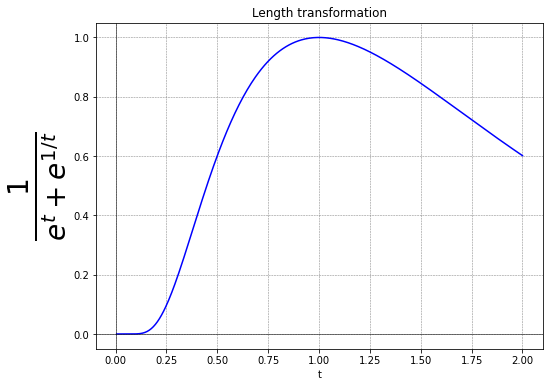

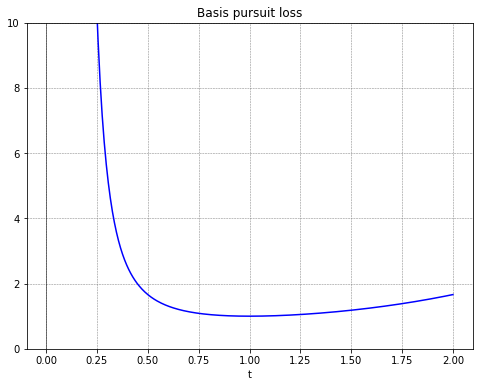

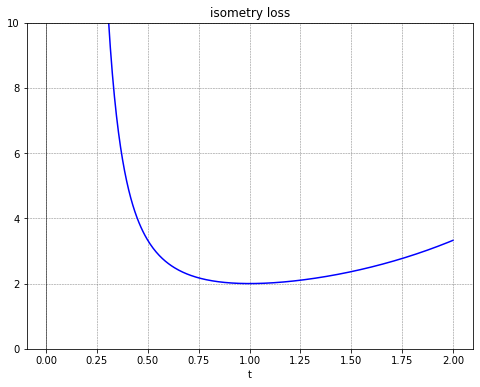

In [5]:
# lets see if the correspondance between the basis pursuit loss and the isometry loss continues for a higher-dimensional identity matrix
# what about square matrix?

rearranged_matrix_values = np.asarray([t * np.identity(2) for t in matrix_values])
length_values = [exponential_transformation(rmv)[0][0] for rmv in rearranged_matrix_values]
loss_values_isometry = [isometry_loss(rmv) for rmv in rearranged_matrix_values]

fig, ax = plt.subplots(1,1,figsize=(8, 6))
ax.plot(matrix_values, np.asarray(length_values)**(-1), color = 'blue')
# ax.plot(t_values, loss_values_isometry, color='blue')
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.set_title('Basis pursuit loss')
ax.set_ylim(0,10)
ax.set_xlabel('t')
fig.show()

fig, ax = plt.subplots(1,1,figsize=(8, 6))
ax.plot(matrix_values, loss_values_isometry, color = 'blue')
# ax.plot(t_values, loss_values_isometry, color='blue')
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.set_title('isometry loss')
ax.set_ylim(0,10)
ax.set_xlabel('t')
fig.show()